In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedraihan","key":"4c3f0699539490ea427b049627f871f3"}'}

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          17739  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10594  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5230  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3809  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [6]:
! kaggle datasets download -d alxmamaev/flowers-recognition

100% 225M/225M [00:01<00:00, 176MB/s]



In [7]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import pathlib
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
dataset_url = "/content/flowers"
data_dir = pathlib.Path(dataset_url)

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4317


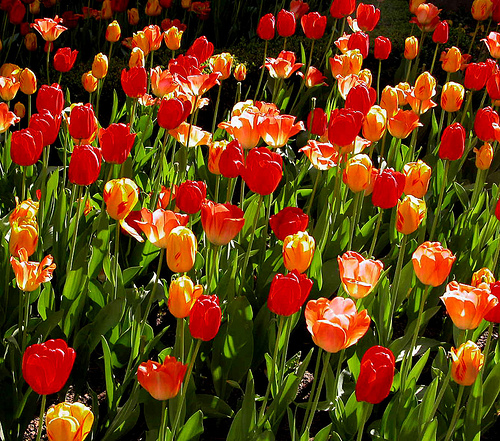

In [11]:
tulip = list(data_dir.glob('tulip/*'))
PIL.Image.open(str(tulip[10]))

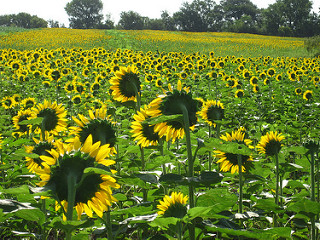

In [12]:
sunflower = list(data_dir.glob('sunflower/*'))
PIL.Image.open(str(sunflower[20]))

In [13]:
batch_size = 32
img_height = 180
img_width = 180

In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split = 0.2, subset = "training", seed = 123, image_size = (img_height, img_width), batch_size = batch_size)


Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split = 0.2, subset = "validation", seed = 123, image_size = (img_height, img_width), batch_size = batch_size)


Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


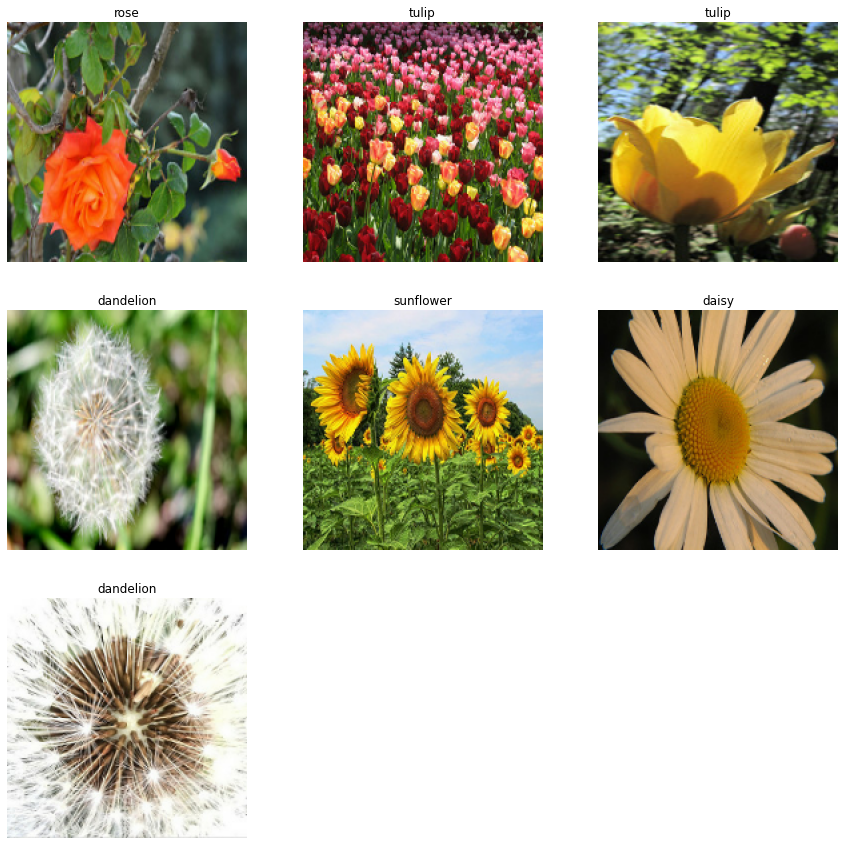

In [17]:
plt.figure(figsize = (15, 15))
for images, labels in train_ds.take(1):
    for i in range(7):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [20]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.98823535


In [22]:
num_classes = 5
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)), layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Flatten(), layers.Dense(128, activation = 'relu'), layers.Dense(num_classes)
]) 

In [23]:
model.compile(optimizer ='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [25]:
epochs = 12
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/12
108/108 [==============================] - 106s 978ms/step - loss: 1.2763 - accuracy: 0.4745 - val_loss: 1.1371 - val_accuracy: 0.5655
Epoch 2/12
108/108 [==============================] - 104s 961ms/step - loss: 1.0041 - accuracy: 0.6138 - val_loss: 0.9696 - val_accuracy: 0.6257
Epoch 3/12
108/108 [==============================] - 104s 960ms/step - loss: 0.8258 - accuracy: 0.6966 - val_loss: 0.9412 - val_accuracy: 0.6269
Epoch 4/12
108/108 [==============================] - 102s 940ms/step - loss: 0.6446 - accuracy: 0.7623 - val_loss: 1.0523 - val_accuracy: 0.6165
Epoch 5/12
108/108 [==============================] - 101s 933ms/step - loss: 0.4580 - accuracy: 0.8364 - val_loss: 0.9821 - val_accuracy: 0.6454
Epoch 6/12
108/108 [==============================] - 104s 964ms/step - loss: 0.2829 - accuracy: 0.9039 - val_loss: 1.1692 - val_accuracy: 0.6431
Epoch 7/12
108/108 [==============================] - 104s 967ms/step - loss: 0.1535 - accuracy: 0.9514 - val_loss: 1.3526 -

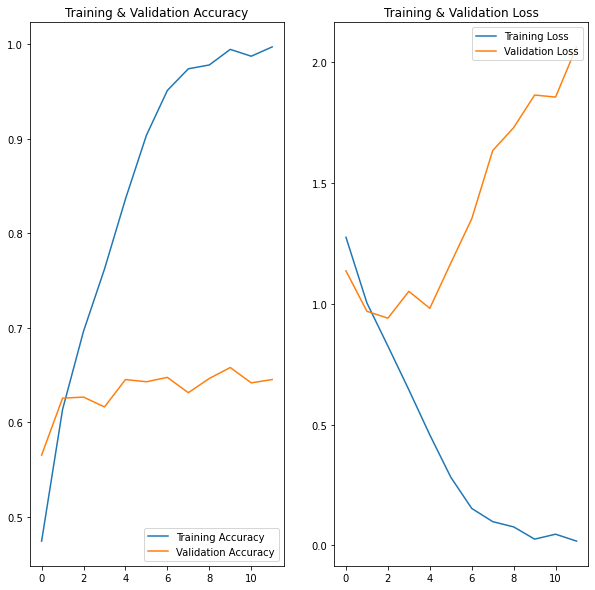

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')
plt.show()

In [27]:
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape = (img_height, img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

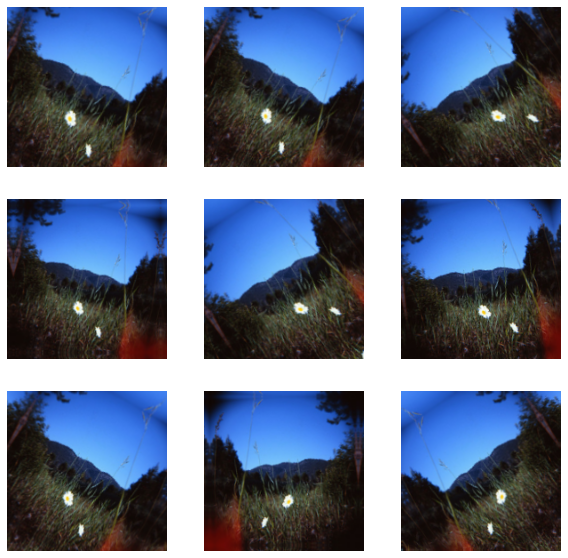

In [28]:
plt.figure(figsize = (10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [29]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation = 'relu'),
  layers.Dense(num_classes)
])

In [30]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [32]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/10
108/108 [==============================] - 123s 1s/step - loss: 1.2404 - accuracy: 0.4650 - val_loss: 1.0598 - val_accuracy: 0.5678
Epoch 2/10
108/108 [==============================] - 128s 1s/step - loss: 1.0245 - accuracy: 0.5967 - val_loss: 0.9768 - val_accuracy: 0.6118
Epoch 3/10
108/108 [==============================] - 122s 1s/step - loss: 0.9498 - accuracy: 0.6335 - val_loss: 0.8841 - val_accuracy: 0.6559
Epoch 4/10
108/108 [==============================] - 131s 1s/step - loss: 0.8618 - accuracy: 0.6659 - val_loss: 0.8271 - val_accuracy: 0.6779
Epoch 5/10
108/108 [==============================] - 122s 1s/step - loss: 0.8012 - accuracy: 0.6963 - val_loss: 0.7860 - val_accuracy: 0.6964
Epoch 6/10
108/108 [==============================] - 122s 1s/step - loss: 0.7599 - accuracy: 0.7050 - val_loss: 0.7817 - val_accuracy: 0.7057
Epoch 7/10
108/108 [==============================] - 122s 1s/step - loss: 0.7390 - accuracy: 0.7183 - val_loss: 0.7141 - val_accuracy: 0.7393

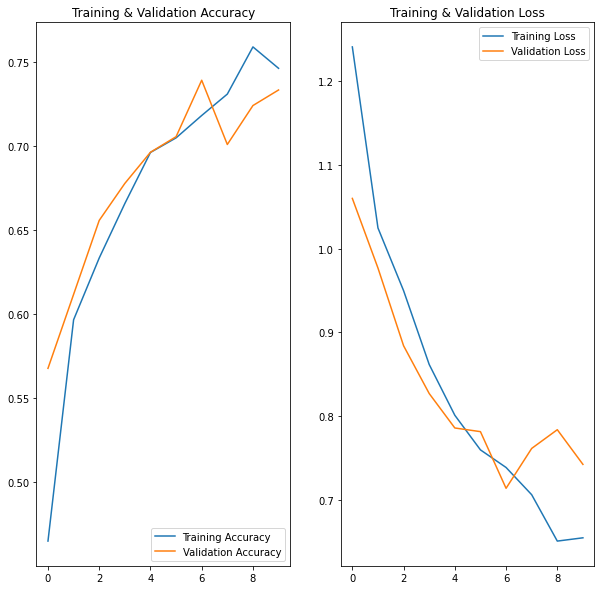

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')
plt.show()

This image most likely belongs to rose with a 71.05 percent confidence.


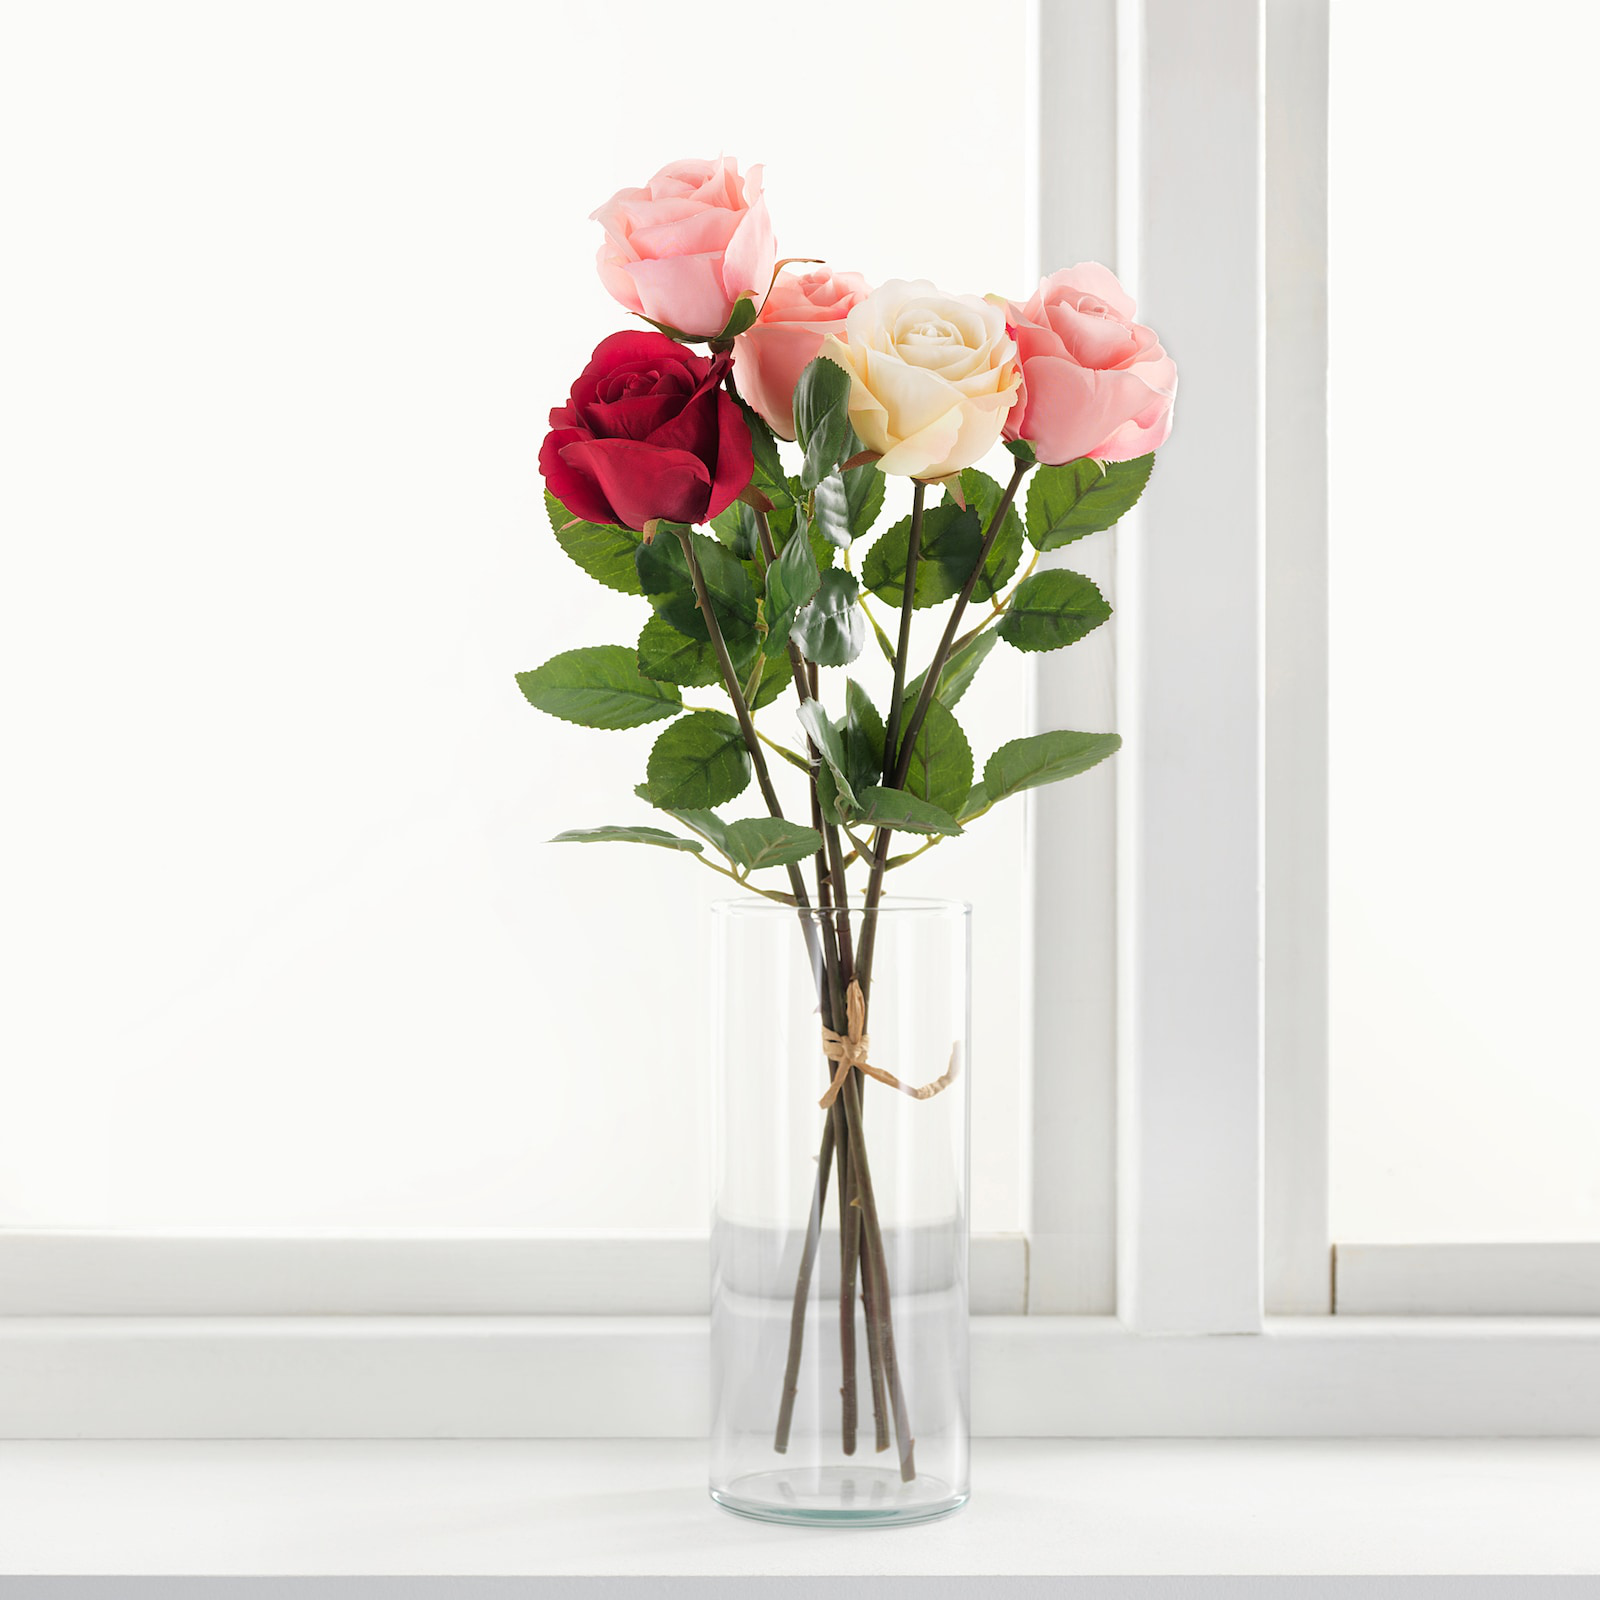

In [42]:
image_url = "https://www.ikea.com/gb/en/images/products/smycka-artificial-flower-rose-red__0902944_PE596726_S5.JPG?f=sg"
image_path = tf.keras.utils.get_file(origin = image_url)
img = keras.preprocessing.image.load_img(
    image_path, target_size = (img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(image_path)

This image most likely belongs to rose with a 32.46 percent confidence.


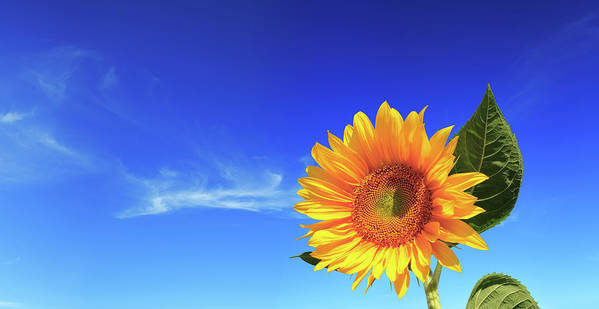

In [43]:
image_url = "https://render.fineartamerica.com/images/rendered/default/poster/8/4/break/images/artworkimages/medium/2/sunflower-on-blue-sky-background-konradlew.jpg"
image_path = tf.keras.utils.get_file(origin = image_url)
img = keras.preprocessing.image.load_img(
    image_path, target_size = (img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(image_path)